In [1]:
import numpy as np

import matplotlib.pyplot as plt

import WDM


# Wavelet transform (exact)

In [2]:
wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=1.0, Nf=16, N=512)

x = np.random.normal(size=wdm.N) # white noise

w = wdm.forward_transform_exact(x)

x_recovered = wdm.inverse_transform_exact(w)

err = np.max(np.abs(x - x_recovered))

print(f"Check small error: {err}")

Check small error: 1.1463218045904e-06


# The truncated wavelet transform

In [3]:
q_vals = [1,2]#,4,8,10,12,14,16]

err_vals = np.zeros(len(q_vals))

for i, q in enumerate(q_vals): 
    wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=1.0, Nf=16, N=512, q=q)

    w = wdm.forward_transform_truncated(x)

    x_recovered = wdm.inverse_transform_truncated(w)

    err_vals[i] = np.max(np.abs(x - x_recovered))

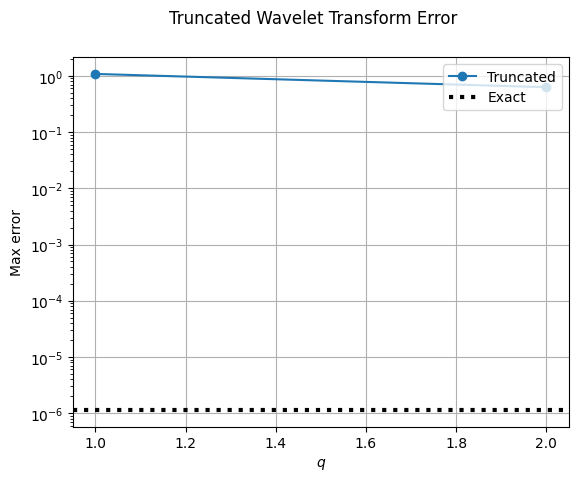

In [4]:
fig, ax = plt.subplots()
fig.suptitle("Truncated Wavelet Transform Error")

ax.plot(q_vals, err_vals, marker='o', label='Truncated')
ax.axhline(err, color='k', lw=3, linestyle=':', label='Exact')

ax.set_xlabel(r"$q$")
ax.set_ylabel(r"Max error")

ax.set_yscale('log')

ax.grid()
ax.legend(loc='upper right')

plt.show()

# The truncated wavelet transform using the window

In [5]:
wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=1.0, Nf=16, N=512)

w = wdm.forward_transform_truncated_window(x)

W = wdm.forward_transform_truncated(x)

print(f"Check small difference: {np.max(np.abs(w-W))}")

Check small difference: 6.535960981324251e-07


# windowed FFT

In [6]:
w = wdm.forward_transform_truncated_windowed_fft(x)

W = wdm.forward_transform_truncated(x)

print(f"Check small difference: {np.max(np.abs(w[:,1:]-W[:,1:]))}")

Check small difference: 6.535960981324251e-07


# FFT

In [7]:
w = wdm.forward_transform_truncated_fft(x)

W = wdm.forward_transform_truncated(x)

print(f"Check small difference: {np.max(np.abs(w[:,1:]-W[:,1:]))}")

Check small difference: 10.577795546447371


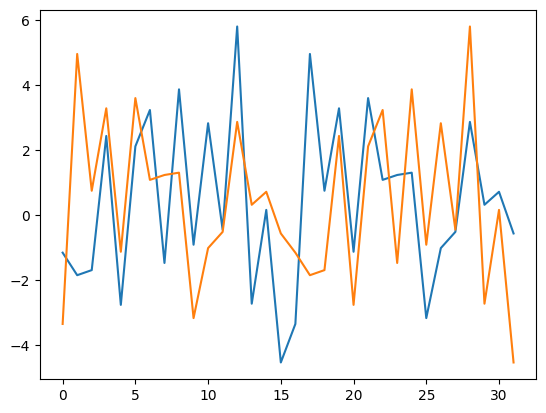

In [8]:
plt.plot(w[:,1])
plt.plot(W[:,1])
plt.show()